In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the data from trouton.csv file
data = pd.read_csv('trouton.csv')

In [3]:
# Read the boiling point (TB) and enthalpies of vaporization (Hv)
TB = data['T_B (K)'].values
Hv = 4200 * data['H_v (kcal/mol)'].values # Convert kcal/mol to J/mol

In [4]:
# Import funtion "ols" from Lecture 7
from function_ols import ols

# Compute slope and intercept by function ols.
slope, intercept = ols(TB, Hv)
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 104.25201313882818
Intercept: -4863.12872339903


In [5]:
# Compare to Trouton’s Rule
print(f'The slope a can be interpreted as an approximation of the entropy of vaporization ΔSv. According to Trouton’s rule, ΔSv ≈ 10.5R (or ∼ 88 J/mol*K), and the fitted slope a is {slope:.2f} J/(mol*K)')

The slope a can be interpreted as an approximation of the entropy of vaporization ΔSv. According to Trouton’s rule, ΔSv ≈ 10.5R (or ∼ 88 J/mol*K), and the fitted slope a is 104.25 J/(mol*K)


In [6]:
Hv_predict = (slope * TB + intercept) # Fitted linear regression model
residuals = Hv - Hv_predict # Calculate the residuls

# Calculate the sum of the squared residuals
def sse(residuals):
    return np.sum(residuals ** 2)


In [7]:
# Calculate the variance of the residuals
def variance(residuals):
    return sse(residuals) / (len(residuals) - 2)


In [8]:
# Calculate the standard error of the slope
def se_slope(x, residuals):
    numerator = variance(residuals)
    x_mean = np.mean(x)
    denominator = np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

# Calculate the standard error of the intercept
def se_intercept(x, residuals):
    numerator = variance(residuals)
    x_mean = np.mean(x)
    denominator = len(x) * np.sum((x - x_mean) ** 2)
    return np.sqrt(numerator / denominator)

In [9]:
# Calculate the confidence interval for the slope
from scipy.stats import t

def confidence_interval_slope(x, residuals, confidence_level):
    se = se_slope(x, residuals) # Calculate the critical t-value
    n_data_points = len(x)
    df = n_data_points - 2  # Degrees of freedom
    alpha = 1 - confidence_level
    critical_t_value = t.ppf(1 - alpha/2, df)

# Calculate the confidence interval
    return critical_t_value * se

In [10]:
# Calculate the confidence interval for the intercept
def confidence_interval_intercept(x, residuals, confidence_level):
    
    se = se_intercept(x, residuals)
    n_data_points = len(x)
    df = n_data_points - 2  
    alpha = 1 - confidence_level
    critical_t_value = t.ppf(1 - alpha/2, df)
 
    return critical_t_value * se


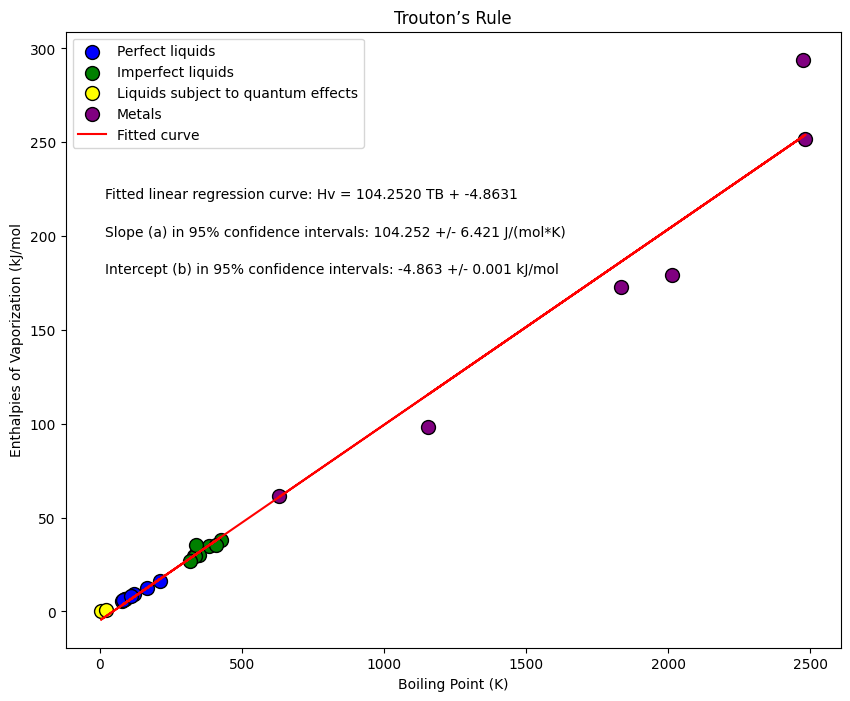

In [11]:
Hv_predict_kJ = Hv_predict/1000 # Convert J/mol to kJ/mol

# Assign colors to different Classes.
class_labels = data['Class'].unique()
colors = ['blue', 'green', 'yellow', 'purple']
class_to_color = {cls: colors[i] for i, cls in enumerate(class_labels)}
data['color'] = data['Class'].map(class_to_color)

plt.figure(figsize=(10, 8))

for cls in class_labels:
    class_data = data[data['Class'] == cls]
    plt.scatter(class_data['T_B (K)'], 4.2*class_data['H_v (kcal/mol)'],# Convert kcal/mol to kJ/mol
                color = class_to_color[cls], label = cls, s = 100, edgecolor = 'black') # Color data points by their Class

plt.plot(TB, Hv_predict_kJ, color = 'red', label = 'Fitted curve') # Plot fitted curve
plt.text(20, 220, f"Fitted linear regression curve: Hv = {slope:.4f} TB + {intercept/1000:.4f}") # Display the equation
plt.text(20, 200, f"Slope (a) in 95% confidence intervals: {slope:.3f} +/- {confidence_interval_slope(TB, residuals, 0.95):.3f} J/(mol*K)") # Slope (a) in 95% confidence intervals
plt.text(20, 180, f"Intercept (b) in 95% confidence intervals: {intercept/1000:.3f} +/- {confidence_interval_intercept(TB, residuals, 0.95)/1000:.3f} kJ/mol") #Intercept (b) in 95% confidence intervals
plt.xlabel('Boiling Point (K)')
plt.ylabel('Enthalpies of Vaporization (kJ/mol')
plt.title('Trouton’s Rule')
plt.legend()
plt.savefig('troutons_rule.png') #Save the plot as a png file
plt.show()
